In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\telecom_customer_churn NEW.csv")

In [3]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [5]:
df.isnull().sum()/df.shape[0]*100

Customer ID                           0.000000
Gender                                0.000000
Age                                   0.000000
Married                               0.000000
Number of Dependents                  0.000000
City                                  0.000000
Zip Code                              0.000000
Latitude                              0.000000
Longitude                             0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                55.047565
Phone Service                         0.000000
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
Internet Service                      0.000000
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech 

In [6]:
# drop null attributes which have above 50% null value

df = df.drop(columns=['Churn Category','Churn Reason','Offer'],axis =1)

In [7]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


**Count of Customer by Churn**

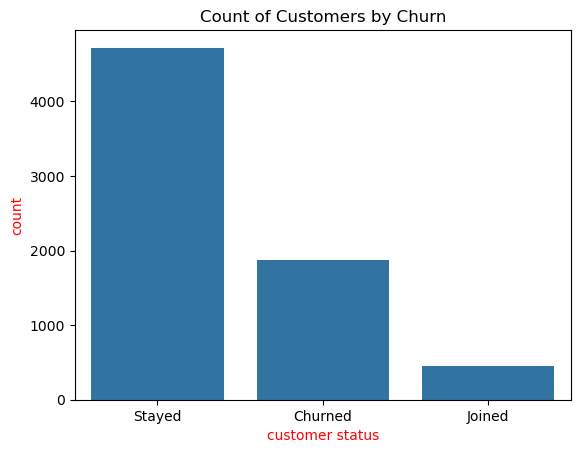

In [8]:
sns.countplot(x="Customer Status", data= df)
plt.xlabel("customer status",color="red")
plt.ylabel("count",color="red")
plt.title("Count of Customers by Churn")
plt.show()

**Percentage of Churned Customer**

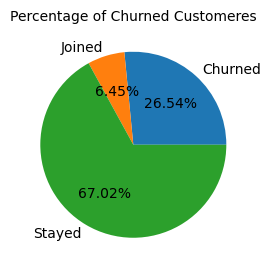

In [9]:
plt.figure(figsize = (3,4))
gb = df.groupby("Customer Status").agg({'Customer Status':"count"})
plt.pie(gb['Customer Status'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out

**Count of churn by Gender**

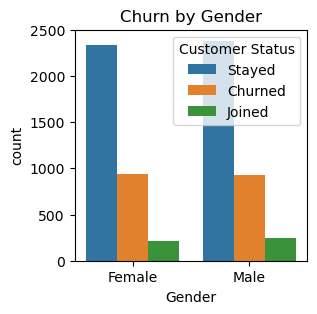

In [10]:
plt.figure(figsize = (3,3))
sns.countplot(x = "Gender", data = df, hue = "Customer Status")
plt.title("Churn by Gender")
plt.show()

**Count of Churn by Martial Status**

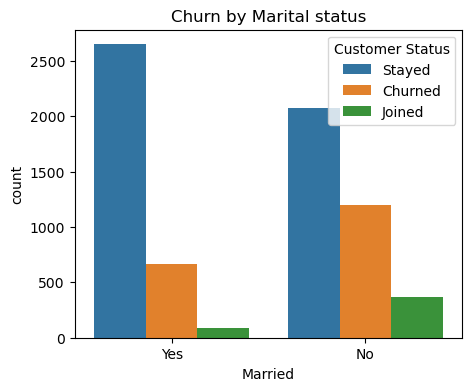

In [11]:
plt.figure(figsize = (5,4))
sns.countplot(x = "Married", data = df, hue = "Customer Status")
plt.title("Churn by Marital status")
plt.show()

#comparative a greater pecentage of people in married category have churned

**Tenure of churn in Months**

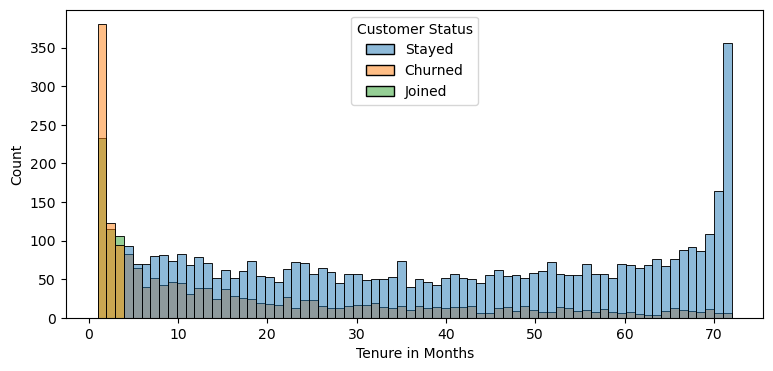

In [12]:
plt.figure(figsize = (9,4))
sns.histplot(x = "Tenure in Months", data = df, bins = 72, hue = "Customer Status")
plt.show()

#people who have used our services for a long time have stayed and people who have used our sevices #1 or 2 months have churned

**Count of Churn by Reason**

#competitor who have better device and better offer has churned.

**Count of Churned Customer by Payment Method**

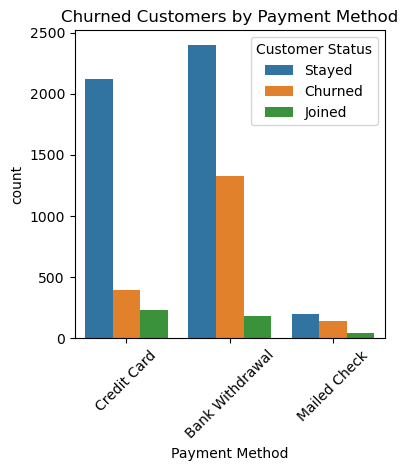

In [13]:
plt.figure(figsize = (4,4))
sns.countplot(x = "Payment Method", data = df, hue = "Customer Status")
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#Customer who have payed through bank withdrawal has churned in greater number.

**Count of Customer Churn by Internet Service**

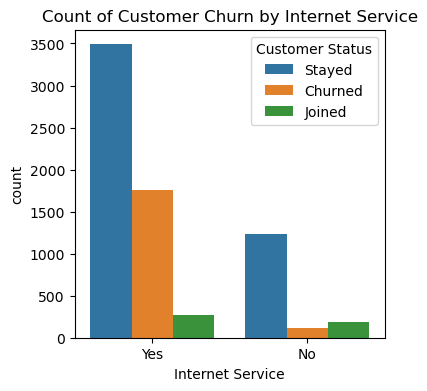

In [14]:
plt.figure(figsize = (4,4))
sns.countplot(x = "Internet Service", data = df, hue= "Customer Status")
plt.title("Count of Customer Churn by Internet Service")
plt.show()

#Customer who have internet service have churned in larger amount.

**Count of Customer Churn by Contract**

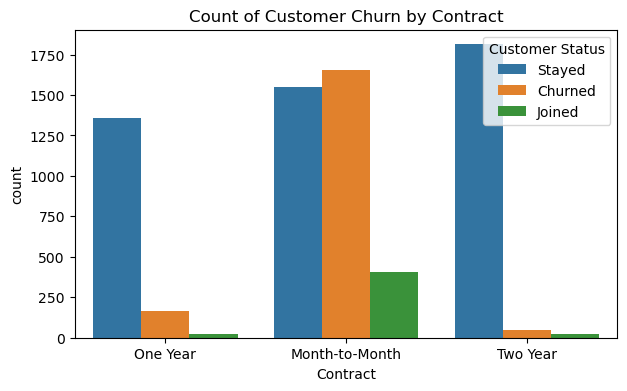

In [15]:
plt.figure(figsize = (7,4))
sns.countplot(x = "Contract", data = df, hue= "Customer Status")
plt.title("Count of Customer Churn by Contract")
plt.show()

#It shows that Customer having month to month Contract has Churned in greater number.

**Count of Customers churn  by internet Type user**

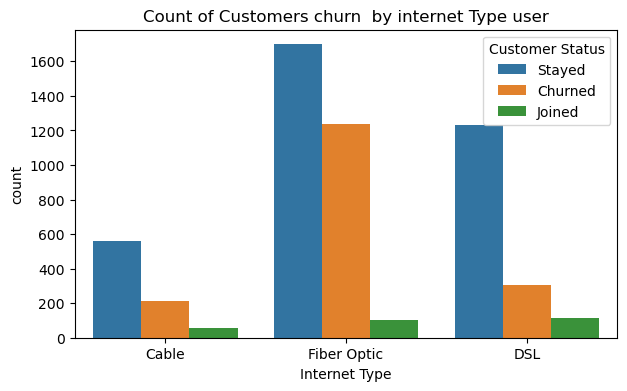

In [16]:
plt.figure(figsize = (7,4))
sns.countplot(x = "Internet Type", data = df, hue= "Customer Status")
plt.title("Count of Customers churn  by internet Type user")
plt.show()

#Customer using Fiber Optic has churned in larger number.

**Count of Customers churn  by Online Security**

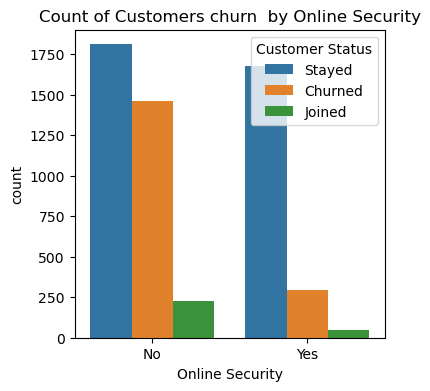

In [17]:
plt.figure(figsize = (4,4))
sns.countplot(x = "Online Security", data = df, hue= "Customer Status")
plt.title("Count of Customers churn  by Online Security")
plt.show()

#Customer using no Online Security has churned.

**Count of Customers churn  by Online Backup**

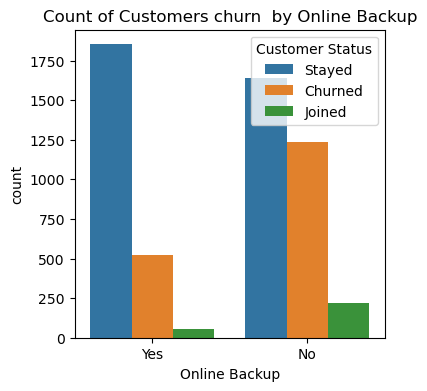

In [18]:
plt.figure(figsize = (4,4))
sns.countplot(x = "Online Backup", data = df, hue= "Customer Status")
plt.title("Count of Customers churn  by Online Backup")
plt.show()

#Customer who does not uses Online Backup has churned.

**Count of Customers by Churn Category**

#Customer having better competitor has churned in larger number.

**Correlation Heatmap**

In [ ]:
# df['Customer Status']
# # Encode 'Churn' if needed
a = {'Stayed':0,'Joined':1,'Churned':2}
df['Customer Status'] = df['Customer Status'].map(a)

# Select only numerical columns
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


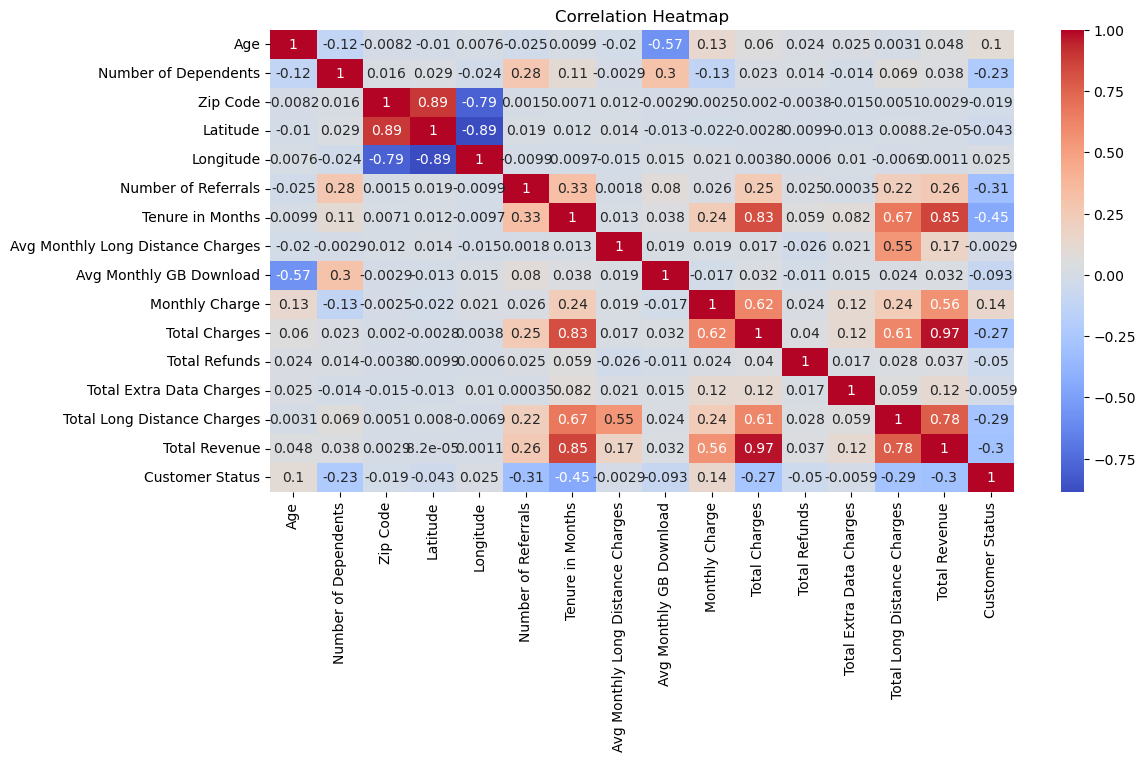

In [20]:
# Select only numerical columns
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

AgeGroup
<18         0
18-30    1529
31-45    1943
46-60    1909
60+      1662
Name: count, dtype: int64


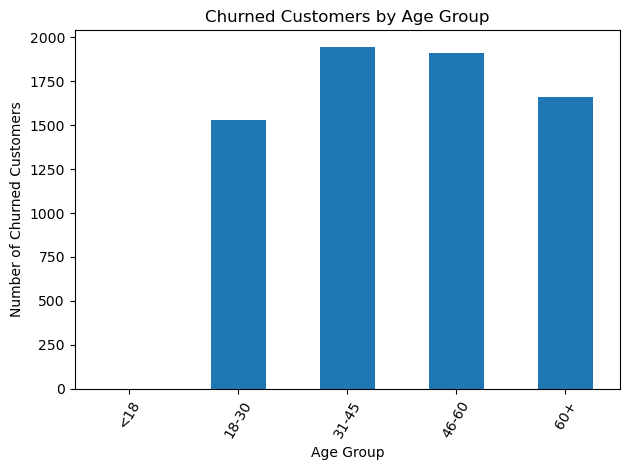

In [21]:
# 1. Create age bins and labels
age_bins = [0, 18, 30, 45, 60, float('inf')]
age_labels = ['<18', '18-30', '31-45', '46-60', '60+']

# 2. Ensure 'Age' is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# 3. Create age group in a NEW column
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# 4. Filter churned customers (assuming 'Yes' means churned)
df_churned = df[df['Customer Status'] == 'Yes'].copy()

# 5. Count churned customers by age group
churn_by_age = df['AgeGroup'].value_counts().sort_index()

# 6. Print and plot
print(churn_by_age)

# Optional: Plot
import matplotlib.pyplot as plt

churn_by_age.plot(kind='bar')
plt.title('Churned Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [125]:
df['Customer Status']

0       0
1       0
2       2
3       2
4       2
       ..
7038    0
7039    2
7040    1
7041    0
7042    0
Name: Customer Status, Length: 7043, dtype: int64

In [23]:
df.head()
# For machine learning we do not need zip code,latitude,longitude so drop it.
df = df.drop(columns=['Zip Code','Longitude','Latitude','City','AgeGroup'],axis = 1)

In [24]:
df.drop(columns='Customer ID',axis=1,inplace=True)

In [25]:
# df.head()
g = {'Female':0,'Male':1}
df['Gender'] = df['Gender'].map(g)

In [26]:
df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,Yes,0,2,9,Yes,42.39,No,Yes,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0
1,1,46,No,0,0,9,Yes,10.69,Yes,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0
2,1,50,No,0,0,4,Yes,33.65,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,2
3,1,78,Yes,0,1,13,Yes,27.82,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,2
4,0,75,Yes,0,3,3,Yes,7.38,No,Yes,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,2


In [27]:
df['Payment Method'].unique()


array(['Credit Card', 'Bank Withdrawal', 'Mailed Check'], dtype=object)

In [28]:
u = {'Credit Card':1,'Bank Withdrawal':2,'Mailed Check':3}
df['Payment Method'] = df['Payment Method'].map(u)  

In [29]:
df['Contract'].unique()
c = {'One Year':3,'Month-to-Month':1,'Two Year':2}
df['Contract'] = df['Contract'].map(c)

#Tenure, total charges, and total revenue show strong positive correlations, indicating they move together.
Age is moderately negatively correlated with data usage, while customer status shows weak correlation with all variables.


In [ ]:
df['Payment Method']

0       1
1       1
2       2
3       2
4       1
       ..
7038    1
7039    2
7040    1
7041    1
7042    2
Name: Payment Method, Length: 7043, dtype: int64

In [30]:
df = pd.get_dummies(df, columns=['Internet Service', 'Internet Type', 'Payment Method'], drop_first=True)

In [31]:
# Convert all boolean columns to 0 and 1
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [32]:
df = df.replace({'Yes': 1, 'No': 0})

C:\Users\user\AppData\Local\Temp\ipykernel_2304\3534361578.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})


In [33]:
df.dtypes

Gender                                 int64
Age                                    int64
Married                                int64
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                       float64
Avg Monthly GB Download              float64
Online Security                      float64
Online Backup                        float64
Device Protection Plan               float64
Premium Tech Support                 float64
Streaming TV                         float64
Streaming Movies                     float64
Streaming Music                      float64
Unlimited Data                       float64
Contract                               int64
Paperless Billing                      int64
Monthly Charge                       float64
Total Charges                        float64
Total Refu

**Count of customer churn by age group**

In [34]:
df['Avg Monthly Long Distance Charges']

0       42.39
1       10.69
2       33.65
3       27.82
4        7.38
        ...  
7038    46.68
7039    16.20
7040    18.62
7041     2.12
7042      NaN
Name: Avg Monthly Long Distance Charges, Length: 7043, dtype: float64

In [35]:
from sklearn.preprocessing import MinMaxScaler

# List of columns to scale
cols_to_scale = [
    'Total Revenue',
    'Total Long Distance Charges',
    'Avg Monthly GB Download',
    'Avg Monthly Long Distance Charges'
]

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
scaled_values = scaler.fit_transform(df[cols_to_scale])

# Replace the original columns with scaled values
df[cols_to_scale] = scaled_values

In [36]:
cols_to_scale = [
    'Age',
    'Total Extra Data Charges',
    'Tenure in Months'
]

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
scaled_values = scaler.fit_transform(df[cols_to_scale])

# Replace the original columns with scaled values
df[cols_to_scale] = scaled_values

In [37]:
df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Avg Monthly GB Download,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Payment Method_2,Payment Method_3
0,0,0.295082,1,0,2,0.112676,1,0.844835,0.0,0.168675,...,0.00,0.000000,0.107024,0.079733,0,1,0,0,0,0
1,1,0.442623,0,0,0,0.112676,1,0.197632,1.0,0.096386,...,38.33,0.066667,0.026989,0.049249,0,1,0,0,0,0
2,1,0.508197,0,0,0,0.042254,1,0.666394,0.0,0.337349,...,0.00,0.000000,0.037759,0.032956,2,1,0,1,1,0
3,1,0.967213,1,0,1,0.169014,1,0.547366,0.0,0.024096,...,0.00,0.000000,0.101455,0.131975,2,1,0,1,1,0
4,0,0.918033,1,0,3,0.028169,1,0.130053,0.0,0.108434,...,0.00,0.000000,0.006211,0.022427,2,1,0,1,0,0


Customers aged 31–45 and 46–60 have the highest churn rates among all age groups.


In [38]:
df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Avg Monthly GB Download,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Payment Method_2,Payment Method_3
0,0,0.295082,1,0,2,0.112676,1,0.844835,0.0,0.168675,...,0.00,0.000000,0.107024,0.079733,0,1,0,0,0,0
1,1,0.442623,0,0,0,0.112676,1,0.197632,1.0,0.096386,...,38.33,0.066667,0.026989,0.049249,0,1,0,0,0,0
2,1,0.508197,0,0,0,0.042254,1,0.666394,0.0,0.337349,...,0.00,0.000000,0.037759,0.032956,2,1,0,1,1,0
3,1,0.967213,1,0,1,0.169014,1,0.547366,0.0,0.024096,...,0.00,0.000000,0.101455,0.131975,2,1,0,1,1,0
4,0,0.918033,1,0,3,0.028169,1,0.130053,0.0,0.108434,...,0.00,0.000000,0.006211,0.022427,2,1,0,1,0,0


In [39]:
x = df.drop('Customer Status',axis =1)
y = df['Customer Status']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [41]:
from sklearn import tree
decision = tree.DecisionTreeClassifier()
decision.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
#Train

0.9995943204868154

[[3309    0    0]
 [   0  308    0]
 [   1    1 1311]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3309
           1       1.00      1.00      1.00       308
           2       1.00      1.00      1.00      1313

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

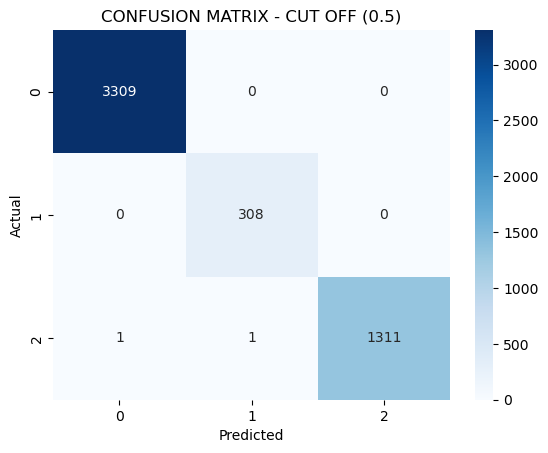

In [42]:
from sklearn import metrics
y_train_predict = decision.predict(x_train)

di_score = decision.score(x_train,y_train)


print(di_score)

print()

print(metrics.confusion_matrix(y_train,y_train_predict))

print()

print(metrics.classification_report(y_train,y_train_predict))
sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot = True,fmt = '.5g',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual');
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [ ]:
# Test 

0.783719829626124

[[1212    0  199]
 [   0   95   51]
 [ 164   43  349]]

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1411
           1       0.69      0.65      0.67       146
           2       0.58      0.63      0.60       556

    accuracy                           0.78      2113
   macro avg       0.72      0.71      0.71      2113
weighted avg       0.79      0.78      0.79      2113



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

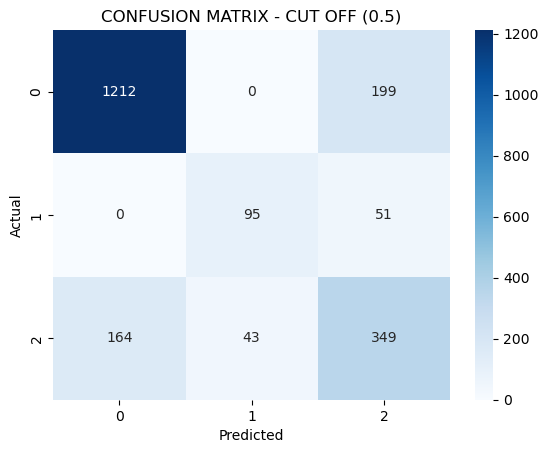

In [ ]:
y_test_predict = decision.predict(x_test)

di_score = decision.score(x_test,y_test)


print(di_score)

print()

print(metrics.confusion_matrix(y_test,y_test_predict))

print()

print(metrics.classification_report(y_test,y_test_predict))

sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict),annot = True,fmt = '.5g',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual');
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')
#'Stayed': 0, 'Joined': 1, 'Churned': 2}